In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import zipfile
import os
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
# Define ZIP file path
zip_file_path =  r"C:\Users\gudal\Downloads\joyeetadey Optimal-Ambulance-Positioning-for-Road-Crashes main Datasets.zip"  # Change this to your ZIP file path
extract_folder = "extracted_data"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Find the CSV file inside the extracted folder
csv_file = None
for file in os.listdir(extract_folder):
    if file.endswith(".csv"):
        csv_file = os.path.join(extract_folder, file)
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found in the extracted ZIP folder.")


In [5]:
# Load the extracted dataset
df = pd.read_csv(csv_file)

# Display dataset info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6318 entries, 0 to 6317
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        6318 non-null   int64  
 1   datetime   6318 non-null   object 
 2   latitude   6318 non-null   float64
 3   longitude  6318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 197.6+ KB
None
   uid             datetime  latitude  longitude
0    1  2018-01-01 00:25:46 -1.188850  36.931382
1    2  2018-01-01 02:02:39 -0.662939  37.208730
2    3  2018-01-01 02:31:49 -0.662939  37.208730
3    4  2018-01-01 03:04:01 -1.288087  36.826583
4    5  2018-01-01 03:58:49 -1.188850  36.931382


In [6]:
# Convert datetime column
df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce')

# Extract time-based features
df["hour"] = df["datetime"].dt.hour
df["day_of_week"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month


C:\Users\gudal\AppData\Local\Temp\ipykernel_2160\2647750163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["hour"], palette="coolwarm")


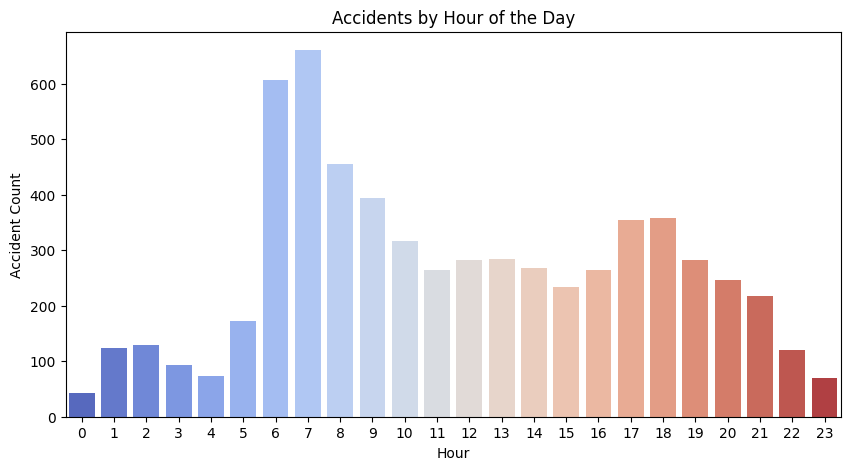

In [8]:
# Plot accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(x=df["hour"], palette="coolwarm")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.xticks(range(0, 24))
plt.show()

C:\Users\gudal\AppData\Local\Temp\ipykernel_2160\3564512472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["day_of_week"], palette="viridis")


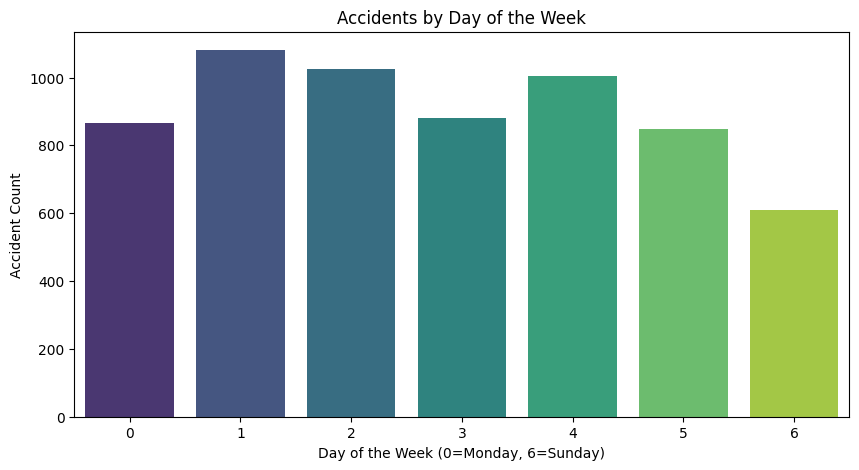

In [9]:
# Plot accidents by day of the week
plt.figure(figsize=(10,5))
sns.countplot(x=df["day_of_week"], palette="viridis")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Accident Count")
plt.show()

In [10]:
# Create a heatmap of accident locations
map_center = [df["latitude"].mean(), df["longitude"].mean()]
heatmap = folium.Map(location=map_center, zoom_start=12)
HeatMap(data=df[["latitude", "longitude"]].values, radius=10).add_to(heatmap)
heatmap.save("accident_heatmap.html")


In [11]:
# Feature Engineering: Identifying High-Risk Areas
# Standardizing location data for clustering
scaler = StandardScaler()
location_data = scaler.fit_transform(df[["latitude", "longitude"]])

In [12]:
# Using DBSCAN for density-based clustering
dbscan = DBSCAN(eps=0.05, min_samples=5)  # Adjust parameters as needed
df["cluster"] = dbscan.fit_predict(location_data)


In [13]:
# Assign High-Risk Labels
high_risk_zones = df["cluster"].value_counts().nlargest(5).index.tolist()
df["high_risk_area"] = df["cluster"].apply(lambda x: 1 if x in high_risk_zones else 0)


In [14]:
# Save updated dataset
df.to_csv("enhanced_accident_data.csv", index=False)

print("EDA and Feature Engineering Completed! Heatmap saved as 'accident_heatmap.html' and updated dataset as 'enhanced_accident_data.csv'")

EDA and Feature Engineering Completed! Heatmap saved as 'accident_heatmap.html' and updated dataset as 'enhanced_accident_data.csv'


In [15]:
# Feature Engineering: Identifying High-Risk Areas
from sklearn.cluster import KMeans

num_clusters = 5  # Change based on dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["latitude", "longitude"]])

In [16]:
# Assign High-Risk Labels
high_risk_threshold = df["cluster"].value_counts().quantile(0.75)  # Top 25% clusters with most accidents
df["high_risk_area"] = df["cluster"].map(lambda x: 1 if df["cluster"].value_counts()[x] >= high_risk_threshold else 0)

In [17]:
# Save updated dataset
df.to_csv("enhanced_accident_data.csv", index=False)

print("EDA and Feature Engineering Completed! Heatmap saved as 'accident_heatmap.html' and updated dataset as 'enhanced_accident_data.csv'")

EDA and Feature Engineering Completed! Heatmap saved as 'accident_heatmap.html' and updated dataset as 'enhanced_accident_data.csv'
